# seaborn可视化练习

In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

## 练习1：航班乘客变化分析
* 分析年度乘客总量变化情况（折线图）
* 分析乘客在一年中各月份的分布（柱状图）

In [2]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


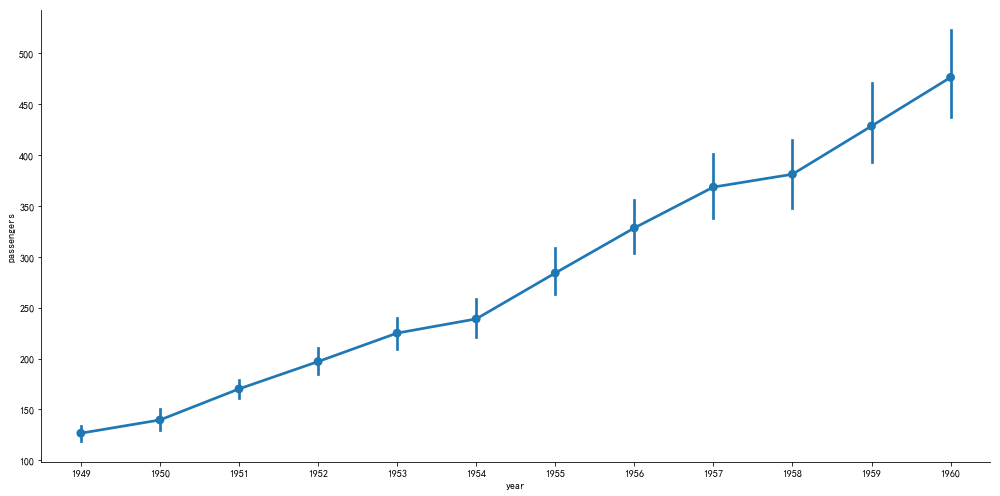

In [3]:
sns.factorplot(x = "year", y = "passengers", data = data, size = 7, aspect = 2 )

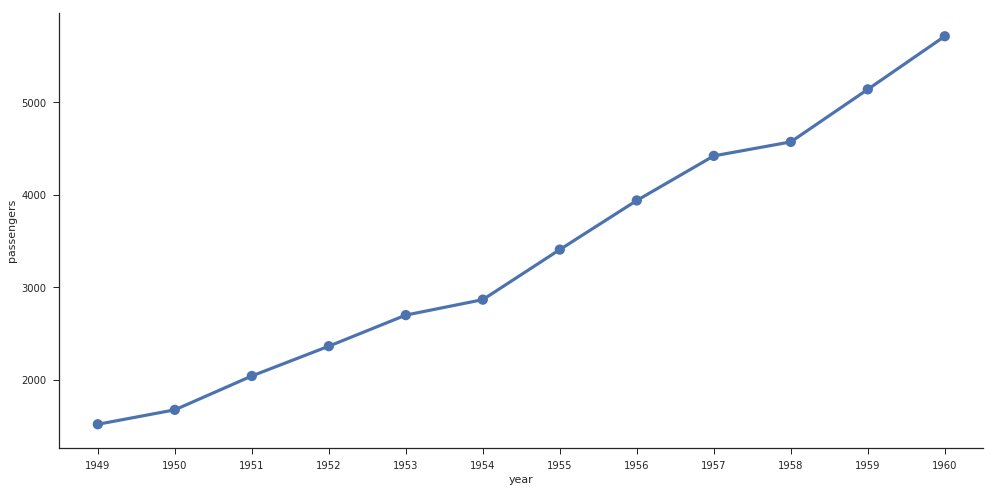

In [4]:
#分析年度乘客总量变化情况（折线图）
tmp = data[['year','passengers']].groupby('year').sum()
tmp.reset_index(inplace = True)
sns.set(style = "ticks")
sns.factorplot(x = "year", y = "passengers", data = tmp, size = 7, aspect = 2 )

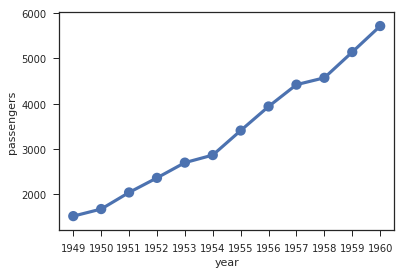

In [5]:
sns.pointplot(x = "year", y = "passengers", data = tmp)

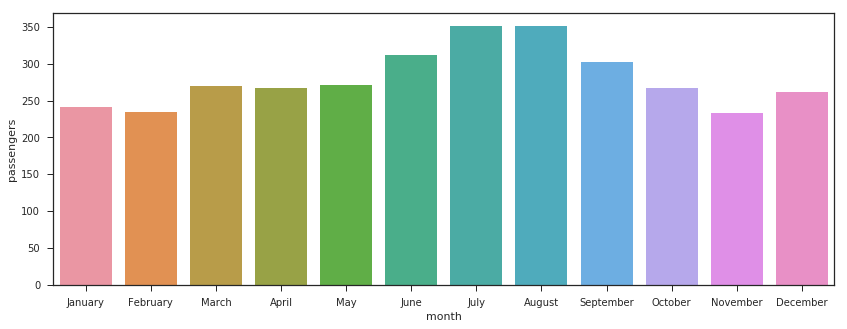

In [6]:
#分析乘客在一年中各月份的分布（柱状图）
tmp = data.groupby('month').mean()
tmp.reset_index(inplace = True)
fig, ax = plt.subplots(figsize = (14,5))
sns.barplot(x = "month", y = "passengers", data = tmp, ax = ax)

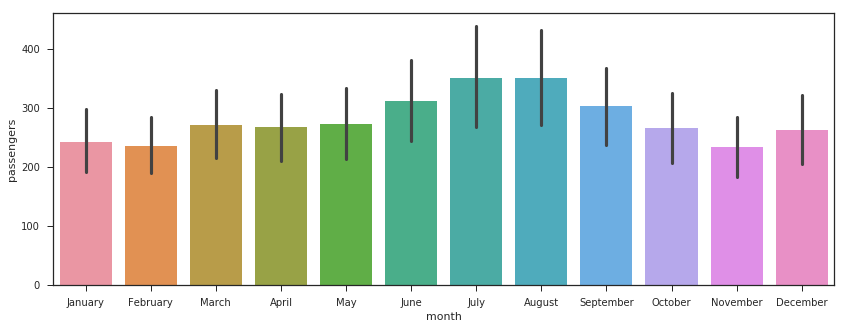

In [7]:
fig, ax = plt.subplots(figsize = (14,5))
sns.barplot(x = "month", y = "passengers", data = data, ax = ax)

## 练习2：鸢尾花花型尺寸分析
* 萼片（sepal）和花瓣（petal）的大小关系（散点图）
* 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）
* 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）

In [155]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [156]:
data['sepal_area'] = data['sepal_length']*data['sepal_width']
data['petal_area'] = data['petal_length']*data['petal_width']
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,setosa,18.00,0.28


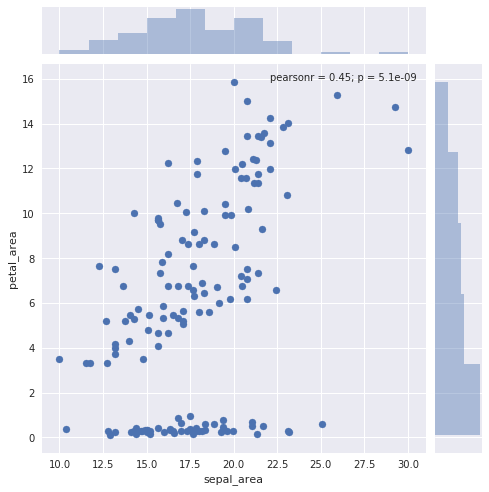

In [157]:
#萼片（sepal）和花瓣（petal）的大小关系（散点图）
sns.set(style = 'darkgrid')
sns.jointplot(x = "sepal_area", y = "petal_area", data = data, size = 7, ratio = 7)

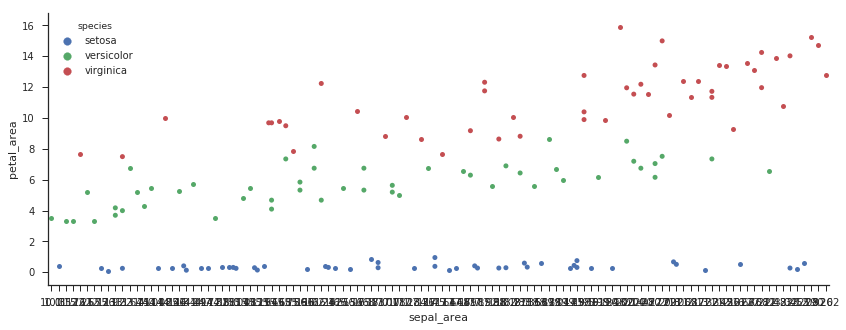

In [161]:
#不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）
#swarmplot:Draw a categorical scatterplot with non-overlapping points.
fig, ax = plt.subplots(figsize = (14,5))
sns.set(style = 'white')
sns.swarmplot(x = "sepal_area", y = "petal_area",  hue = 'species', data = data, ax = ax)

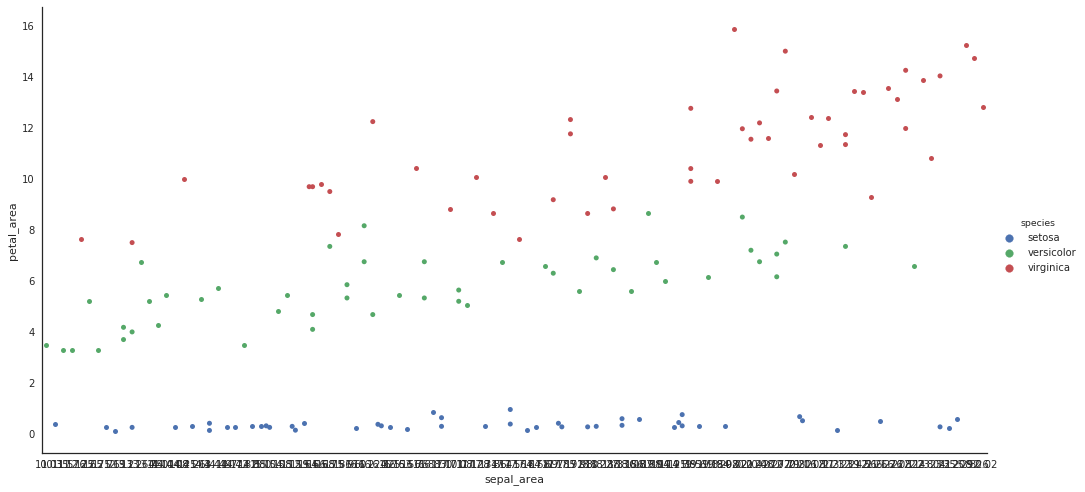

In [162]:
sns.factorplot(x = "sepal_area", y = "petal_area", hue = "species", data = data, kind = "swarm",size = 7, aspect = 2 )

In [225]:
#不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,setosa,18.00,0.28


In [226]:
#将两个度量用两个维属性标识，即增加一个维度字段
tmp1 = data[['species','sepal_area']]
tmp1['area_type'] = 'sepal_area'
tmp1.columns = ['species','area','area_type']
tmp2 = data[['species','petal_area']]
t
tmp2.columns = ['species','area','area_type']
tmp = tmp1.append(tmp2, ignore_index=True)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [234]:
tmp.head()

,species,area,area_type
0,setosa,17.85,sepal_area
1,setosa,14.70,sepal_area
2,setosa,15.04,sepal_area
3,setosa,14.26,sepal_area
4,setosa,18.00,sepal_area


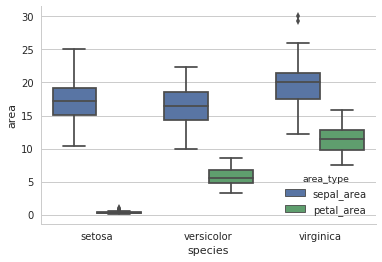

In [229]:
#箱式图
sns.set_style('whitegrid')
sns.boxplot(x = "species", y = "area", hue = "area_type", data = tmp)

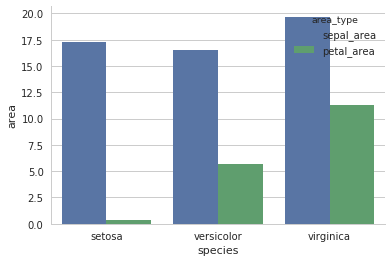

In [227]:
#柱状图
sns.barplot(x = "species", y = "area", hue = "area_type", data = tmp, ci=None)

##### 以下不对数据增加维度，保持原始dataframe结构

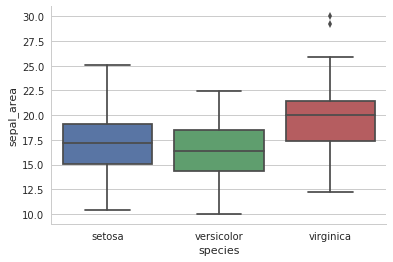

In [230]:
#不同种类鸢尾花萼片的分布
sns.set_style('whitegrid')
sns.boxplot(x = "species", y ="sepal_area", data = data)

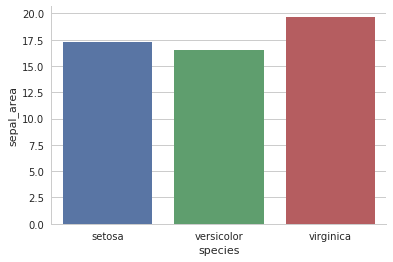

In [231]:
sns.barplot(x = "species", y = "sepal_area", data = data, ci=None)

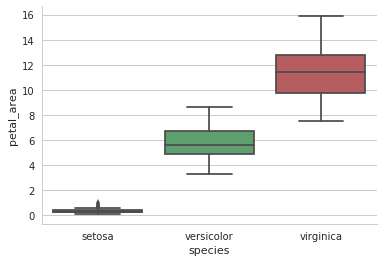

In [232]:
#不同种类鸢尾花花瓣大小的分布情况
sns.boxplot(x = "species", y ="petal_area", data = data)

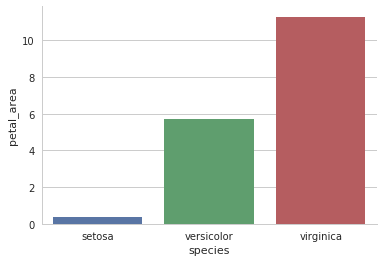

In [233]:
sns.barplot(x = "species", y = "petal_area", data = data, ci=None)

## 练习3：餐厅小费情况分析
* 小费和总消费之间的关系（散点图）
* 男性顾客和女性顾客，谁更慷慨（分类箱式图）
* 抽烟与否是否会对小费金额产生影响（分类箱式图）
* 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
* 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）
* 就餐人数是否会对慷慨度产生影响（分类箱式图）
* 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

In [235]:
data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


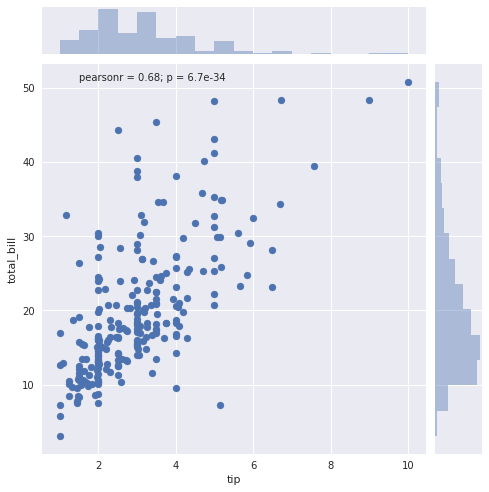

In [236]:
# 小费和总消费之间的关系（散点图）
sns.set(style = 'darkgrid')
sns.jointplot(x = "tip", y = "total_bill", data = data, size = 7, ratio = 7)

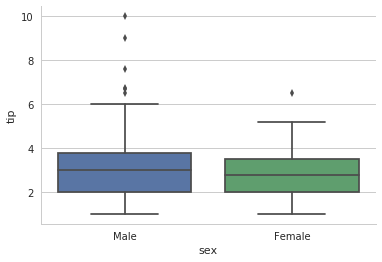

In [238]:
#男性顾客和女性顾客，谁更慷慨（分类箱式图）
sns.set_style('whitegrid')
sns.boxplot(x = "sex", y = "tip", data = data)

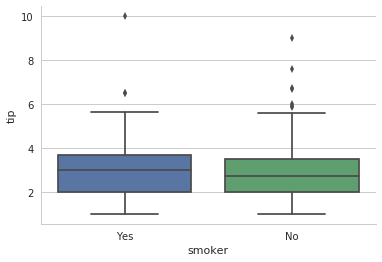

In [249]:
#抽烟与否是否会对小费金额产生影响（分类箱式图）
sns.boxplot(x = "smoker", y = "tip", data = data)

In [291]:
#工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
tmp = data[['day','tip']]
tmp['is_weekend'] = tmp['day'].isin(['Sun','Sat']).replace({True:'Yes',False:'No'})
tmp.tail()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,day,tip,is_weekend
239,Sat,5.92,Yes
240,Sat,2.00,Yes
241,Sat,2.00,Yes
242,Sat,1.75,Yes
243,Thur,3.00,No


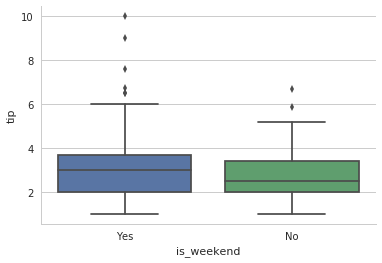

In [292]:
sns.boxplot(x = "is_weekend", y = "tip", data = tmp)

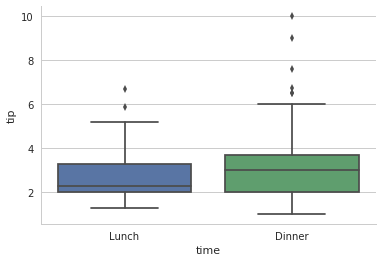

In [295]:
#午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）
sns.boxplot(x = "time", y = "tip", data = data)

In [293]:
#就餐人数是否会对慷慨度产生影响（分类箱式图）

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


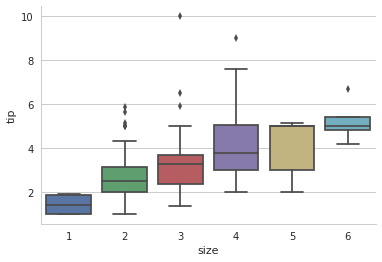

In [296]:
#就餐人数是否会对慷慨度产生影响（分类箱式图）
sns.boxplot(x = "size",y = "tip", data = data)

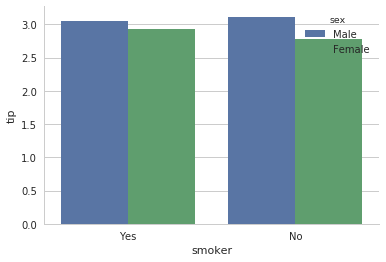

In [299]:
#性别+抽烟的组合因素对慷慨度的影响（分组柱状图）
sns.barplot(x = "smoker", y = "tip", hue = "sex", data = data, ci=None)

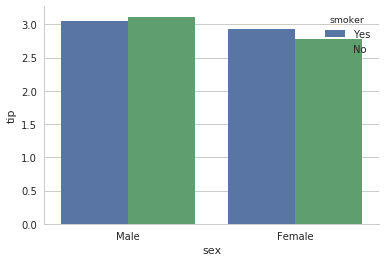

In [300]:
#上面的图更容易分析
sns.barplot(x = "sex", y = "tip", hue = "smoker", data = data, ci=None)

## 练习4：泰坦尼克号海难幸存状况分析
* 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）
* 不同性别的幸存比例（堆积柱状图）
* 幸存和遇难乘客的票价分布（分类箱式图）
* 幸存和遇难乘客的年龄分布（分类箱式图）
* 不同上船港口的乘客仓位等级分布（分组柱状图）
* 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）
* 幸存和遇难乘客父母子女的数量分布（分类箱式图）
* 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

In [436]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [328]:
#不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）
pclass_alive = data[['pclass','alive']].groupby(['pclass','alive']).size().unstack()
pclass_alive['total'] = pclass_alive['yes']+pclass_alive['no']
pclass_alive.reset_index(inplace = True)
pclass_alive

alive,pclass,no,yes,total
0,1,80,136,216
1,2,97,87,184
2,3,372,119,491


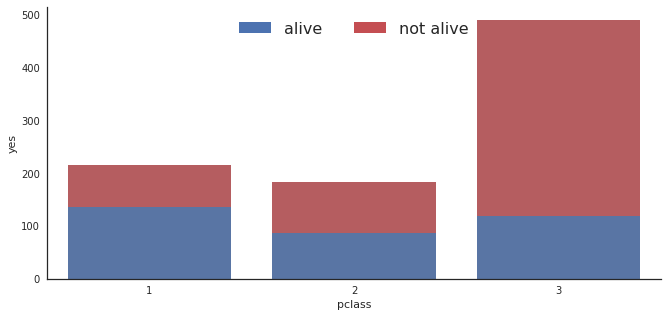

In [344]:
fig, ax = plt.subplots(figsize = (11,5)) #设置图的大小
sns.barplot(x = "pclass", y  = "total", data = pclass_alive, color = "r", ax = ax)
bottom_plot = sns.barplot(x = "pclass", y  = "yes", data = pclass_alive, color = "b", ax = ax)
alive_bar = plt.Rectangle((0,0),1,1,fc='b',  edgecolor = 'none')
not_alive_bar = plt.Rectangle((0,0),1,1,fc='r',  edgecolor = 'none')
plt.legend([alive_bar, not_alive_bar], ['alive', 'not alive'], ncol = 2, prop={'size':16},loc = 'upper center')


In [ ]:
#不同性别的幸存比例（堆积柱状图）

In [345]:
sex_alive = data[['sex','alive']].groupby(['sex','alive']).size().unstack()
sex_alive['total'] = sex_alive['yes']+sex_alive['no']
sex_alive.reset_index(inplace = True)
sex_alive

alive,sex,no,yes,total
0,female,81,233,314
1,male,468,109,577


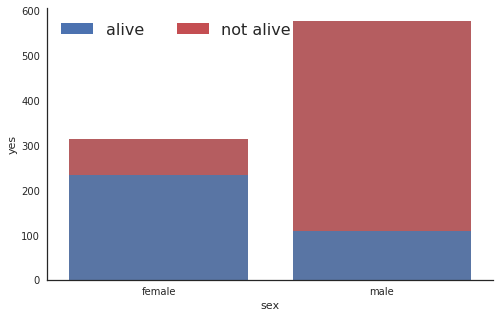

In [350]:
fig, ax = plt.subplots(figsize = (8,5)) #设置图的大小
sns.barplot(x = "sex", y  = "total", data = sex_alive, color = "r", ax = ax)
bottom_plot = sns.barplot(x = "sex", y  = "yes", data = sex_alive, color = "b", ax = ax)
alive_bar = plt.Rectangle((0,0),1,1,fc='b',  edgecolor = 'none')
not_alive_bar = plt.Rectangle((0,0),1,1,fc='r',  edgecolor = 'none')
plt.legend([alive_bar, not_alive_bar], ['alive', 'not alive'], ncol = 2, prop={'size':16},loc = 2)

In [437]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


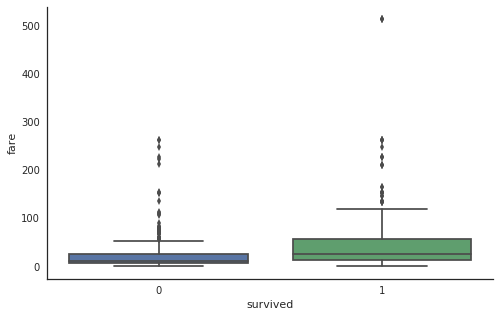

In [358]:
#幸存和遇难乘客的票价分布（分类箱式图）
fig, ax = plt.subplots(figsize = (8,5)) #设置图的大小
sns.boxplot(x = "survived", y = "fare", data = data,ax = ax)

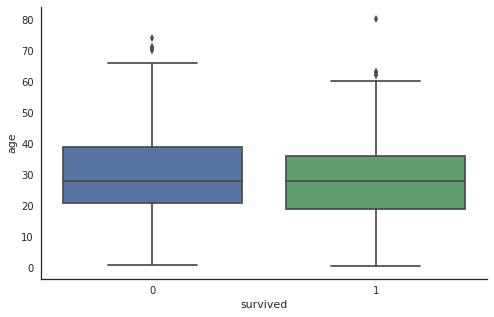

In [361]:
#幸存和遇难乘客的年龄分布（分类箱式图）
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "survived", y = "age", data = data, ax = ax)

In [443]:
#不同上船港口的乘客仓位等级分布（分组柱状图）
embarked_class = data[['embarked','class']].groupby(['embarked','class']).size().unstack()
#embarked_class.reset_index(inplace = True) 报错 是因为columns是CategoricalIndex  跟index无关 
embarked_class.columns = list(embarked_class.columns)
embarked_class.reset_index(inplace = True)
embarked_class

,embarked,First,Second,Third
0,C,85,17,66
1,Q,2,3,72
2,S,127,164,353


In [461]:
#将三个度量用三个维属性标识，即增加一个维度字段
import pandas as pd #为什么不引入pandas包也可以
tmp1 = embarked_class[['embarked','First']]
tmp1['class'] = 'First'
tmp2 = embarked_class[['embarked','Second']]
tmp2['class'] = 'Second'
tmp3 = embarked_class[['embarked','Third']]
tmp3['class'] = 'Third'
tmp1.columns = ['embarked','class_num','class']
tmp2.columns = ['embarked','class_num','class']
tmp3.columns = ['embarked','class_num','class']
tmp = pd.concat([tmp1,tmp2,tmp3], ignore_index=True)
tmp

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

,embarked,class_num,class
0,C,85,First
1,Q,2,First
2,S,127,First
3,C,17,Second
4,Q,3,Second
5,S,164,Second
6,C,66,Third
7,Q,72,Third
8,S,353,Third


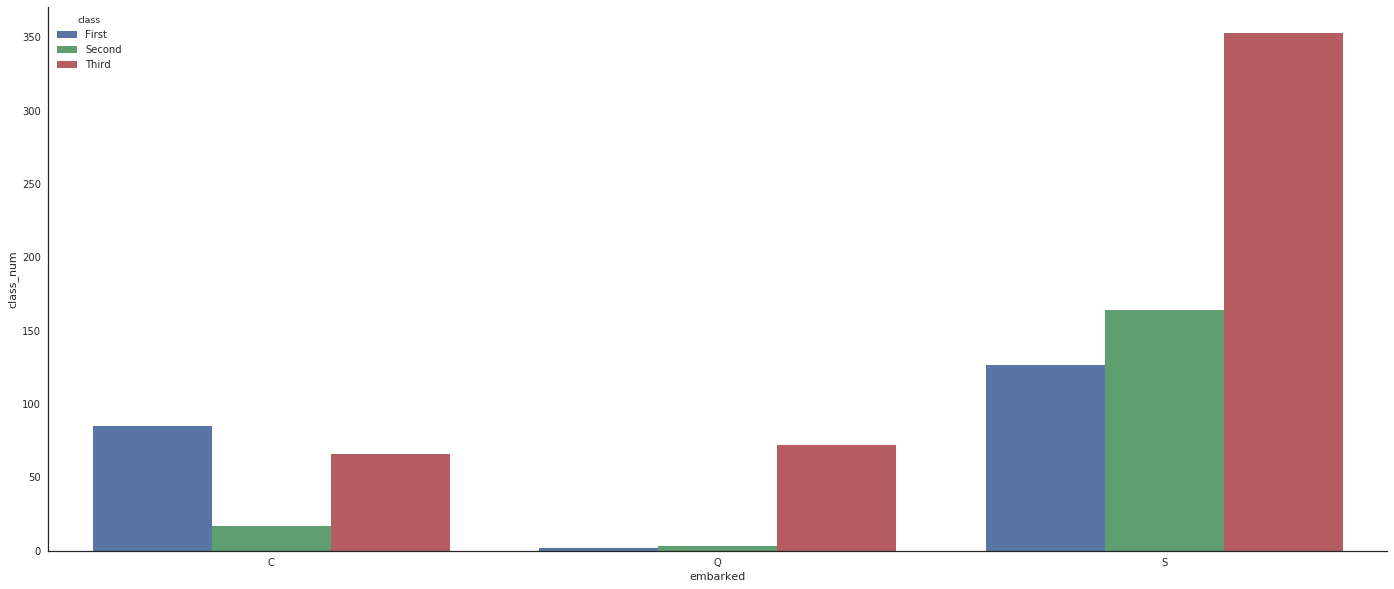

In [462]:
sns.barplot(x = "embarked", y = "class_num", hue = "class", data = tmp, ci=None)

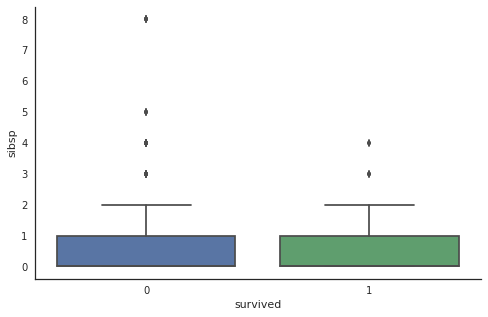

In [463]:
#幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）
fig, ax = plt.subplots(figsize = (8,5)) #设置图的大小
sns.boxplot(x = "survived", y = "sibsp", data = data,ax = ax)

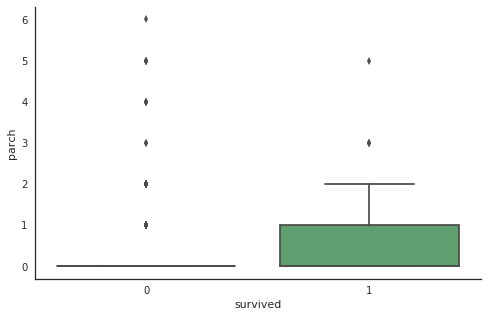

In [464]:
#幸存和遇难乘客父母子女的数量分布（分类箱式图）
fig, ax = plt.subplots(figsize = (8,5)) #设置图的大小
sns.boxplot(x = "survived", y = "parch", data = data,ax = ax)

In [475]:
#单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）
alive_alone = data[['alone','alive']].groupby(['alone','alive']).size().unstack()
alive_alone.reset_index(inplace = True)
tmp1 = alive_alone[['alone','yes']]
tmp1['alive'] = 'yes'
tmp2 = alive_alone[['alone','no']]
tmp2['alive'] = 'no'
tmp1.columns = [['alone','number','is_alive']]
tmp2.columns = [['alone','number','is_alive']]
tmp = pd.concat([tmp1,tmp2], ignore_index=True)
tmp

,alone,number,is_alive
0,False,179,yes
1,True,163,yes
2,False,175,no
3,True,374,no


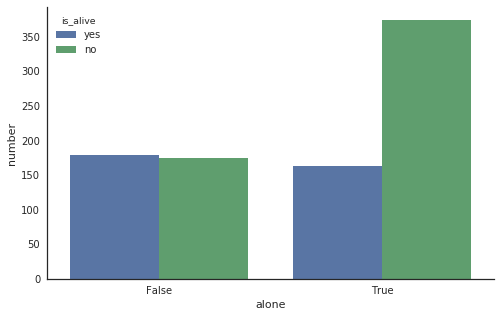

In [477]:
fig, ax = plt.subplots(figsize = (8,5)) #设置图的大小
sns.barplot(x = "alone", y = "number", hue = "is_alive", data = tmp, ci=None, ax = ax)

#### 后话 
- seaborn中没有现成的堆叠柱状图
- 因为作者不喜欢

I don't really like stacked bar charts, I'd suggest maybe using pointplot / factorplot with kind=point

— Michael Waskom (@michaelwaskom) September 4, 2014

#### 曲线救国

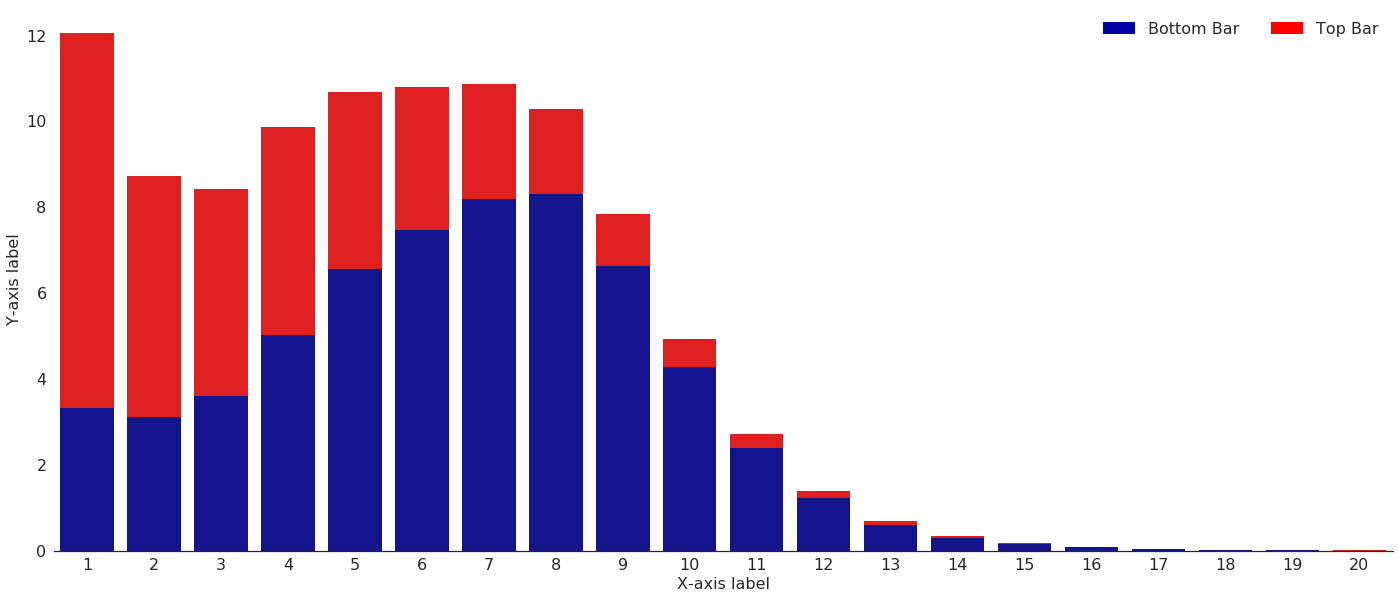

In [313]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#Read in data & create total column
stacked_bar_data = pd.read_csv("stacked_bar.csv")
stacked_bar_data["total"] = stacked_bar_data.Series1 + stacked_bar_data.Series2

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.Series1, color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Bottom Bar', 'Top Bar'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Y-axis label")
bottom_plot.set_xlabel("X-axis label")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)